In [1]:
#Importing the necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
from datetime import datetime
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


%matplotlib inline


In [2]:
df=pd.read_csv("breast-cancer-wisconsin-data.csv")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


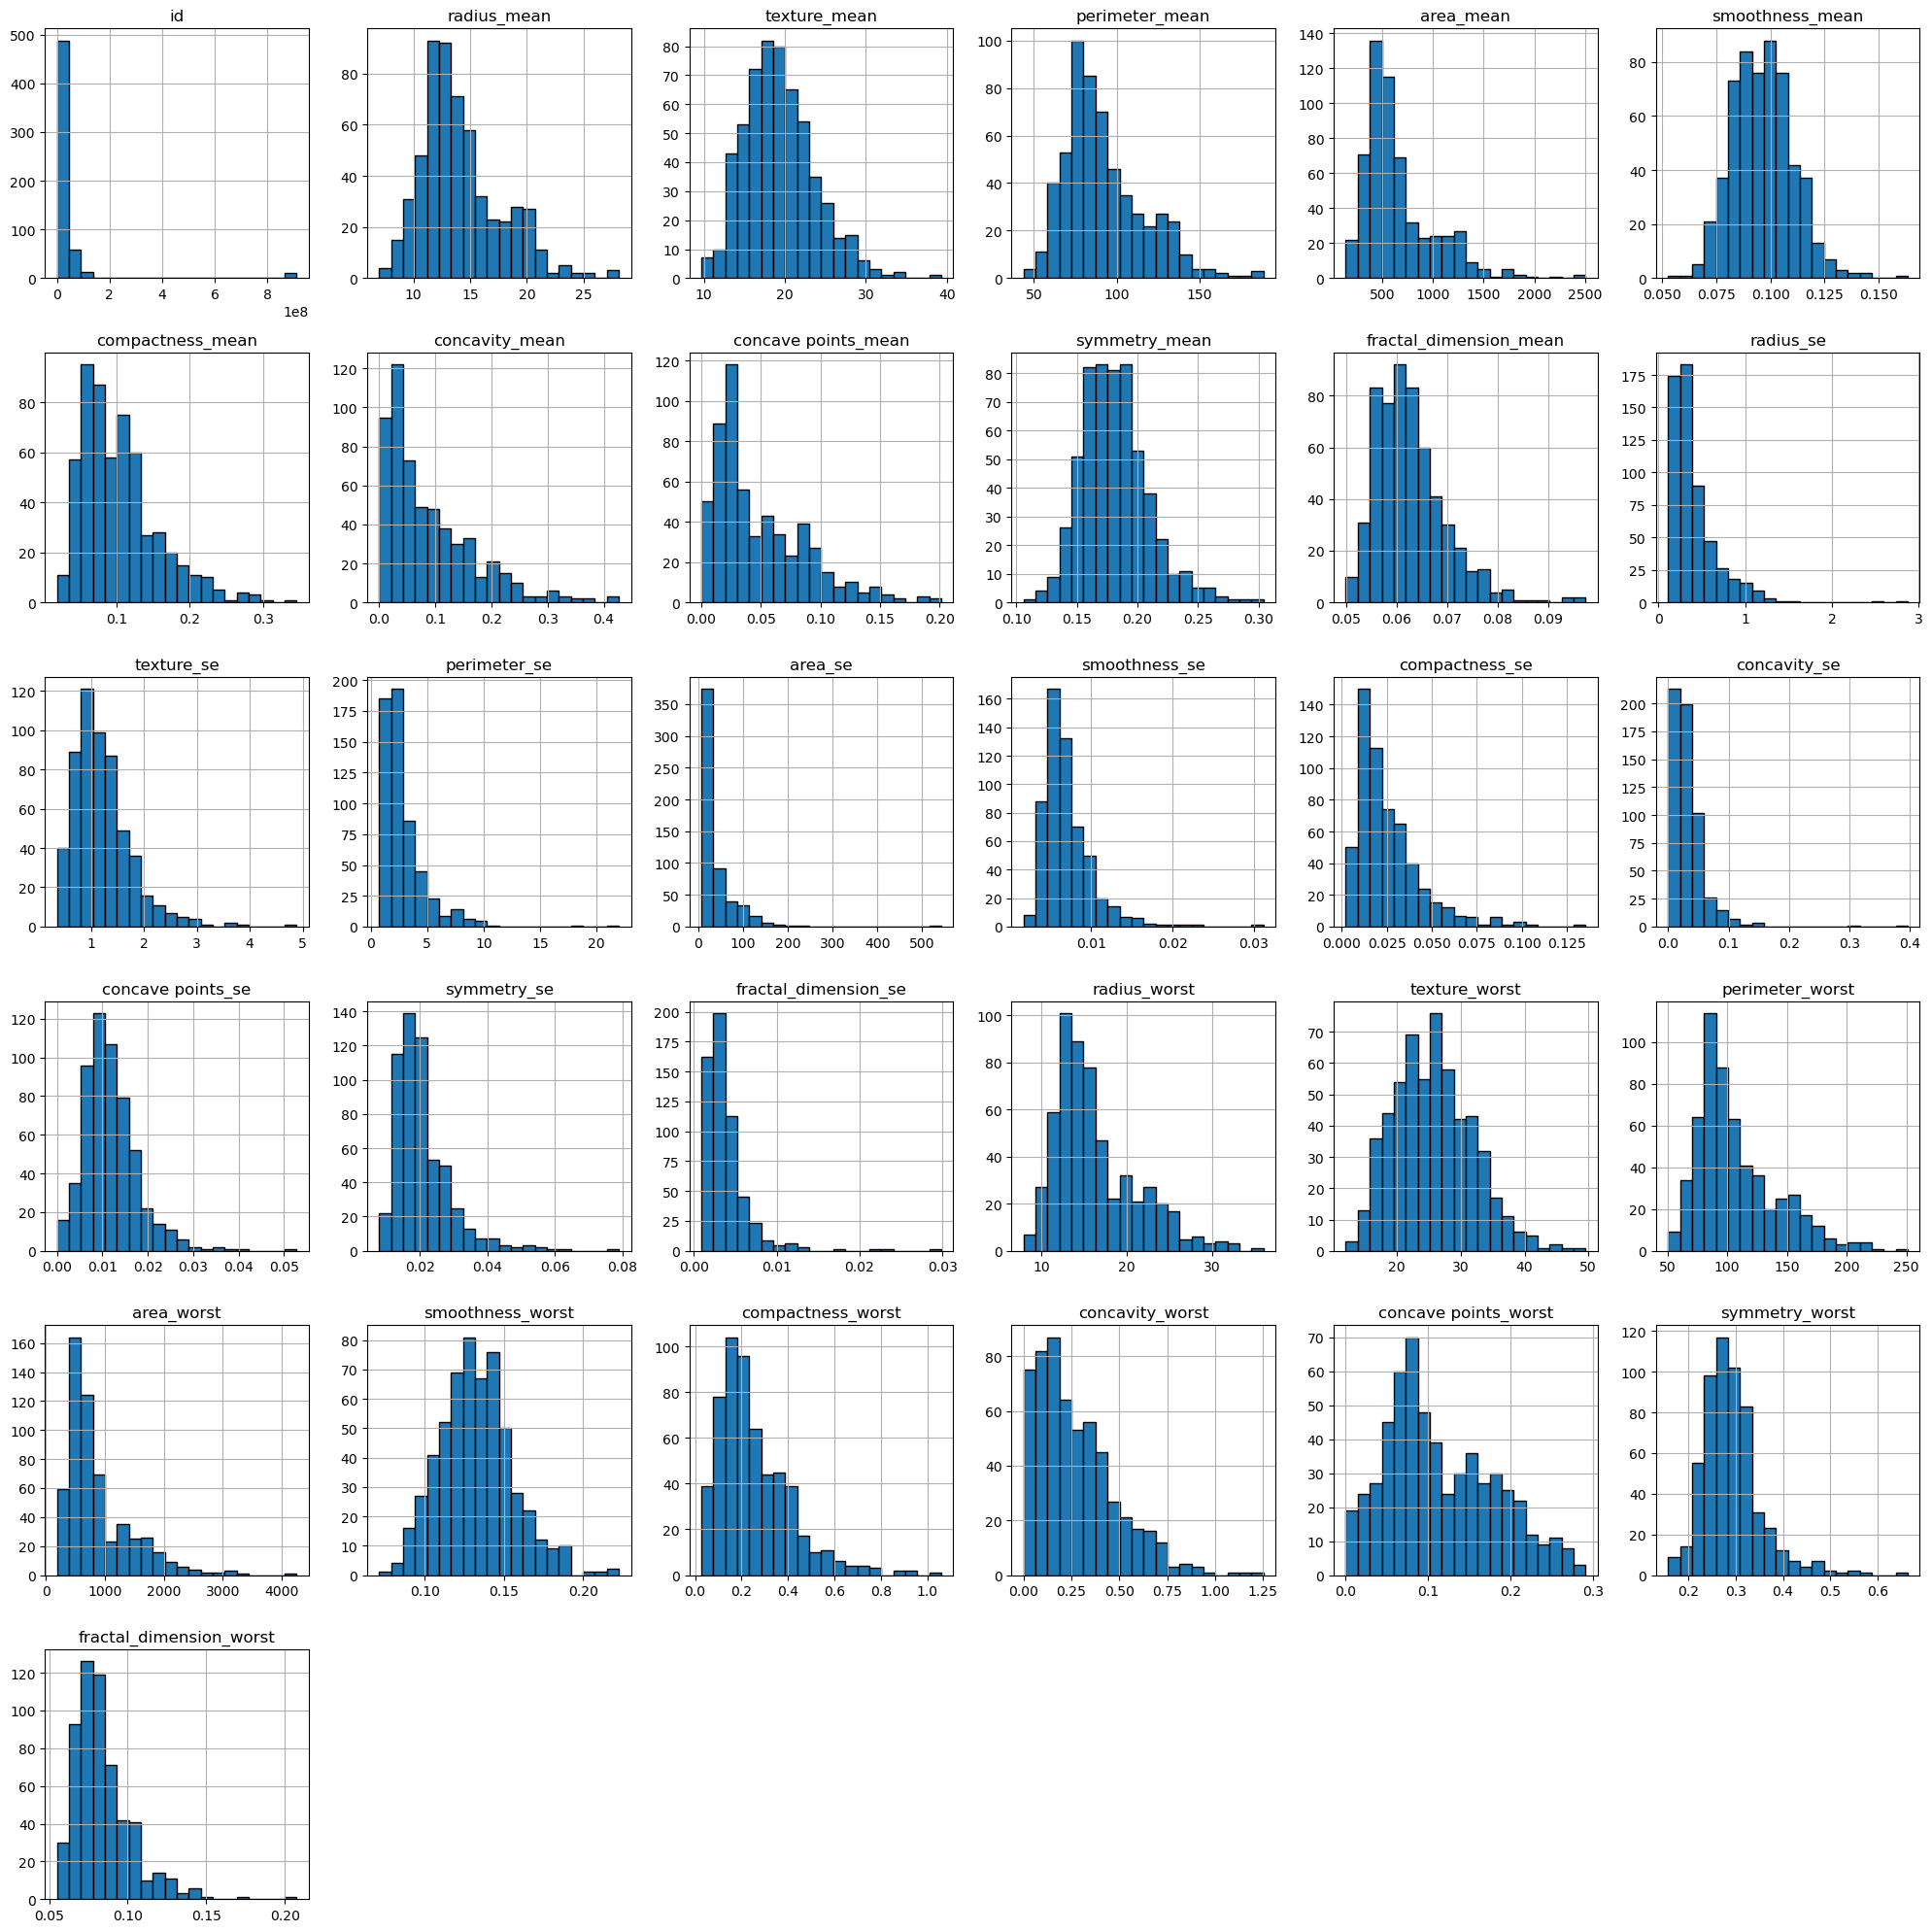

In [5]:
# Check distribution of values
df.hist(figsize=(20, 20), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

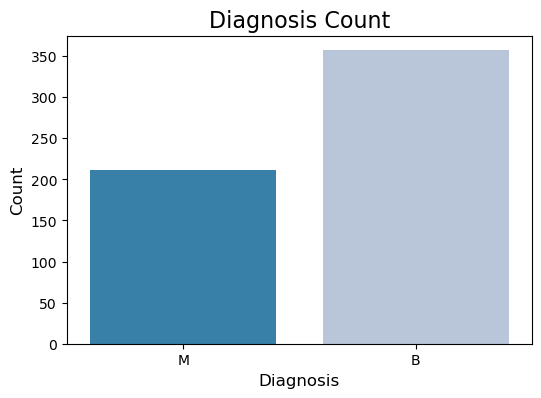

In [6]:
# Create the count plot of diagnosis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosis', palette='PuBu_r')

# Set labels and title
plt.title('Diagnosis Count', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show();

In [7]:
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Select only numeric columns
numeric = df.select_dtypes(include=['number'])



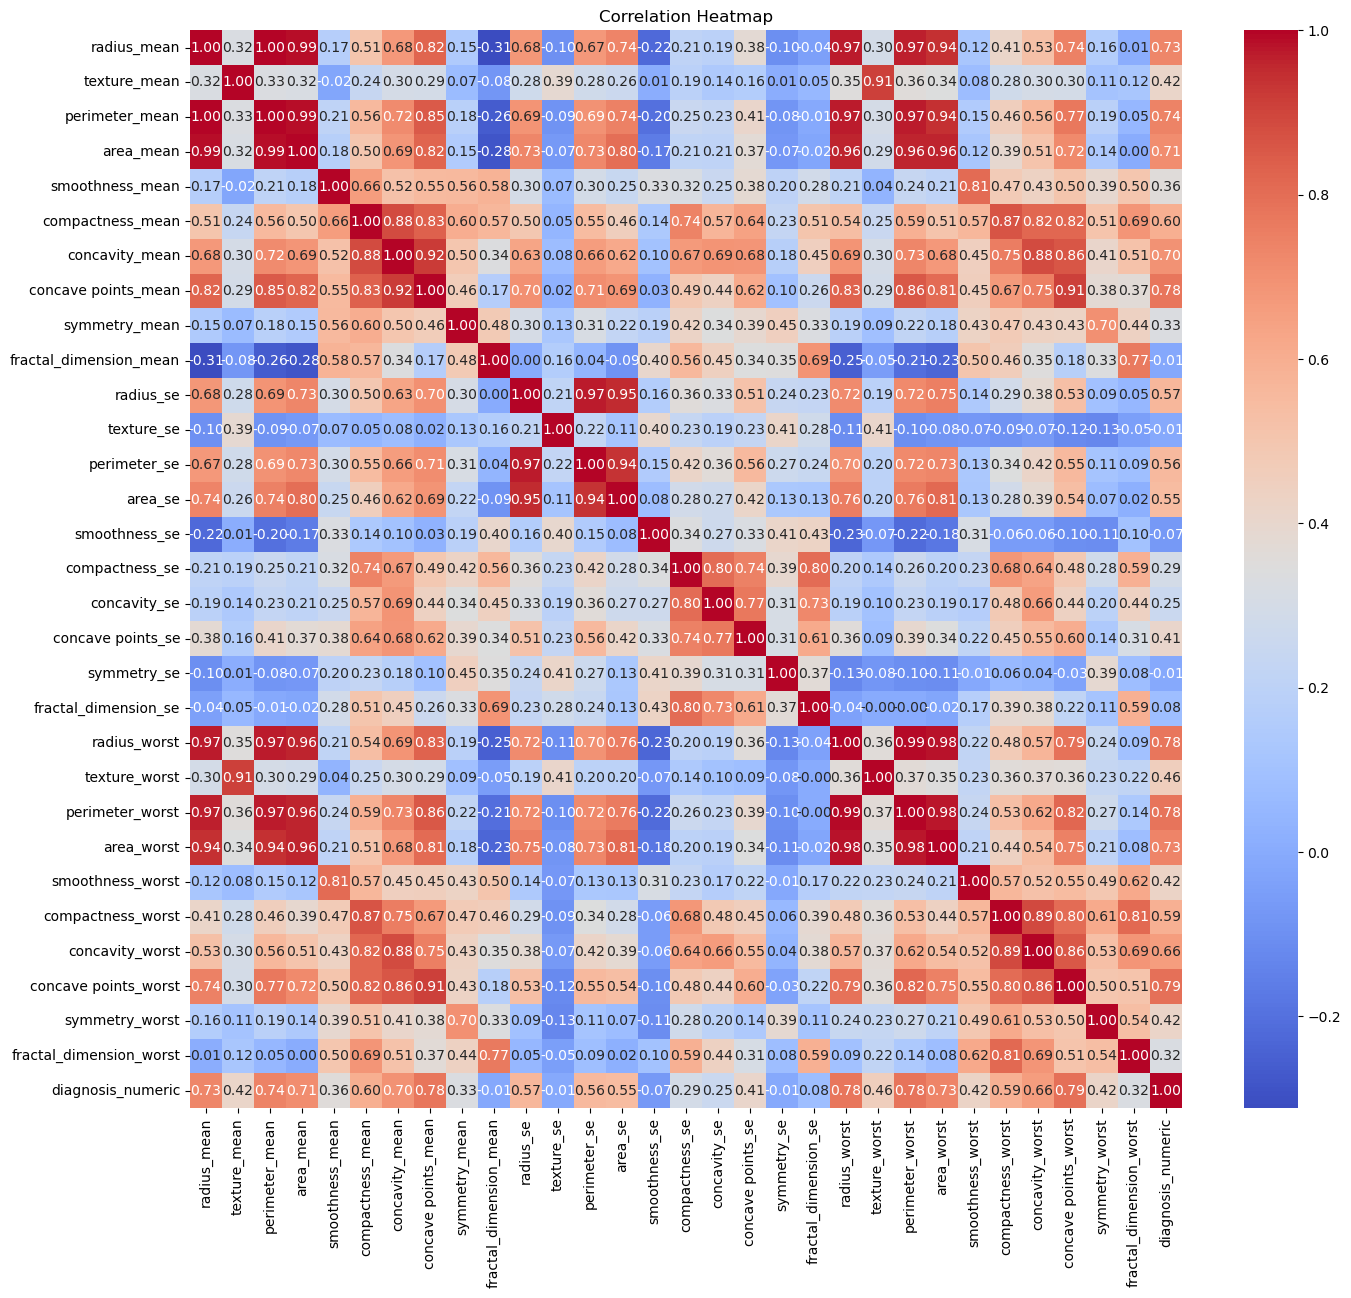

[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'radius_mean'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('concavity_mean', 'concave points_mean'), ('concave points_mean', 'concavity_mean'), ('concave points_mean', 'concave points_worst'), ('radius_se', 'perimeter_se'), ('radius_se', 'area_se'), ('perimeter_se', 'radius_se'), ('perimeter_se', 'area_se'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('radius_worst', 'perimeter_worst'), ('radius_worst', 'are

In [8]:
df_excluded = df.drop(columns=['id', 'diagnosis'])
num_cols = [cols for cols in df_excluded.columns if df_excluded[cols].dtype in ['int64', 'float64']]

correlation_matrix = df_excluded.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated features-pairs
threshold = 0.9
highly_correlated = [(col1, col2) for col1 in df_excluded.columns for col2 in df_excluded.columns 
                     if abs(correlation_matrix.loc[col1, col2]) > threshold and col1 != col2]
print(highly_correlated)

### Quite a lot of correlated features

In [9]:
# Example for 'perimeter_mean' vs 'radius_mean'
corr, p_value = pearsonr(df['perimeter_mean'], df['radius_mean'])
print(f"Pearson's correlation: {corr}, p-value: {p_value}")

# If p-value < 0.05, the variables are likely dependent

Pearson's correlation: 0.9978552814938112, p-value: 0.0


In [10]:
# Example for 'perimeter_mean' vs 'radius_worst'
corr, p_value = pearsonr(df['radius_mean'], df['radius_worst'])
print(f"Pearson's correlation: {corr}, p-value: {p_value}")

# If p-value < 0.05, the variables are likely dependent

Pearson's correlation: 0.9695389726112063, p-value: 0.0


In [11]:
# Example for 'perimeter_mean' vs 'concave points_worst'
corr, p_value = pearsonr(df['radius_mean'], df['concave points_worst'])
print(f"Pearson's correlation: {corr}, p-value: {p_value}")

# If p-value < 0.05, the variables are likely dependent

Pearson's correlation: 0.7442141978674669, p-value: 1.9017954557726946e-101


### Interpret the Value:
Pearson's correlation coefficient of 0.7442 represents a strong positive linear relationship.
This indicates that as one variable increases, the other tends to increase as well.

### Interpret the p-value:
A p-value of 2.56e-113 is extremely small, meaning the relationship is statistically significant.
This shows that the probability of observing such a correlation due to random chance is effectively zero.

In [12]:
# Spearman’s correlation test
corr, p_value = spearmanr(df['perimeter_mean'], df['radius_mean'])
print(f"Spearman's correlation: {corr}, p-value: {p_value}")

Spearman's correlation: 0.9978017394617466, p-value: 0.0


In [13]:
# Spearman’s correlation test
corr, p_value = spearmanr(df['radius_mean'], df['concave points_worst'])
print(f"Spearman's correlation: {corr}, p-value: {p_value}")

Spearman's correlation: 0.7272651798851105, p-value: 9.690036070629625e-95


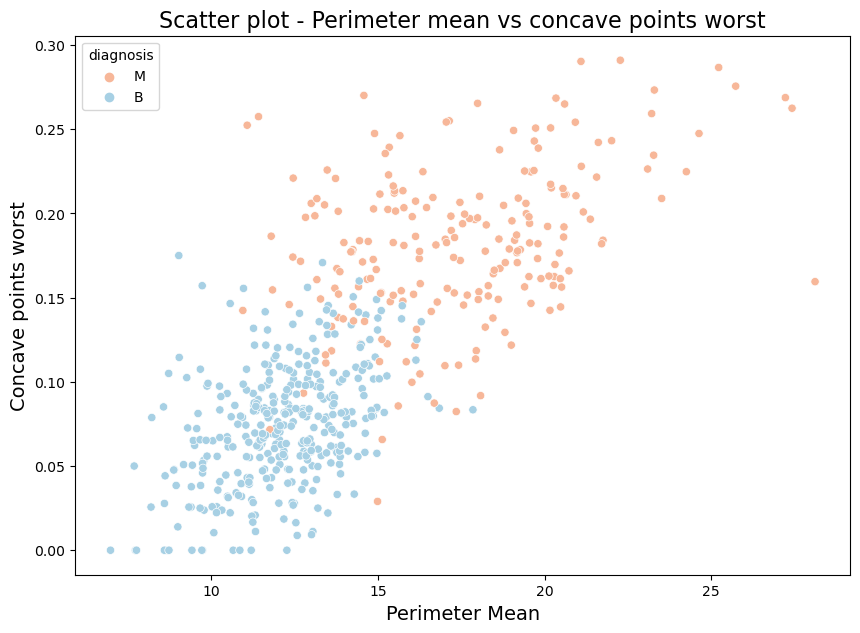

In [14]:
### Scatter plot between concave points_worst and perimeter_mean

fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='radius_mean',y='concave points_worst', palette='RdBu', hue='diagnosis')
plt.title('Scatter plot - Perimeter mean vs concave points worst', fontsize=16)
plt.xlabel('Perimeter Mean', fontsize=14)
plt.ylabel('Concave points worst', fontsize=14)

plt.show();

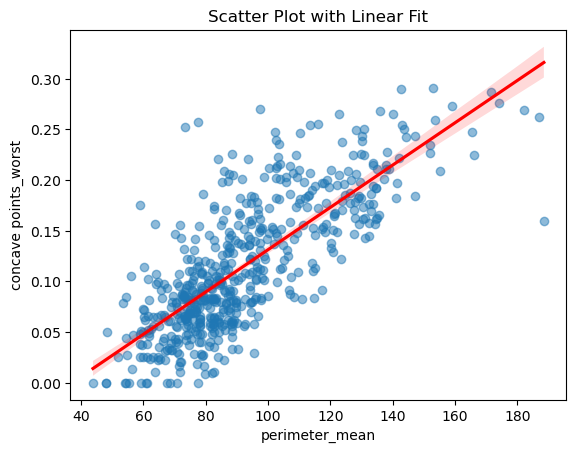

In [15]:
sns.regplot(x='perimeter_mean', y='concave points_worst', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Fit')
plt.show()

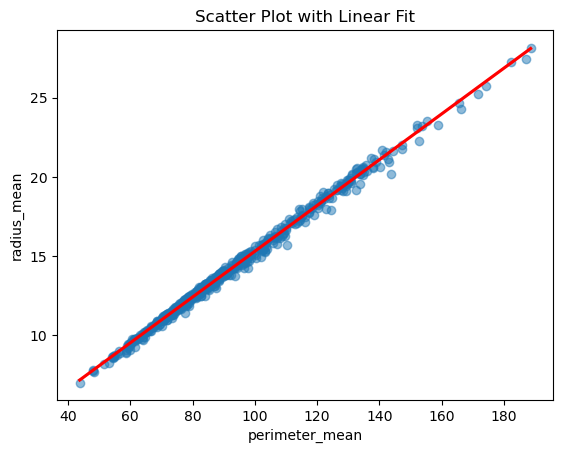

In [247]:
sns.regplot(x='perimeter_mean', y='radius_mean', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Fit')
plt.show()

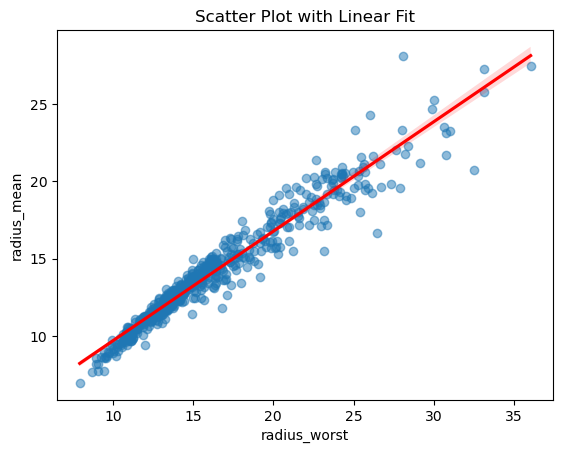

In [248]:
sns.regplot(x='radius_worst', y='radius_mean', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Fit')
plt.show()

### If for the pair 'radius_mean'-'perimeter_mean' is everything clear, about the pair 'radius_mean' and 'concave points_ worst' is not the same 

In [249]:
X = df[['radius_mean', 'concave points_worst']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                Feature       VIF
0           radius_mean  7.544115
1  concave points_worst  7.544115


In [250]:
X = df[['radius_mean', 'radius_worst']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        Feature         VIF
0   radius_mean  162.780083
1  radius_worst  162.780083


In [251]:
X = df[['perimeter_mean', 'radius_mean']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          Feature          VIF
0  perimeter_mean  2192.512412
1     radius_mean  2192.512412


In [252]:
#additional test
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(df[['radius_mean', 'concave points_worst']], df['diagnosis'])
print(mutual_info)

[0.36904902 0.43579778]


In [253]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[num_cols])
print(pca.explained_variance_ratio_)


# Get the PCA components (loadings)
loadings = pca.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(
    loadings.T,  # Transpose so each row corresponds to a feature
    columns=[f'PC{i+1}' for i in range(loadings.shape[0])],  # Name the principal components
    index=num_cols  # Use feature names as the index
)

print(loadings_df)

[0.98204444 0.01617648]
                                  PC1           PC2
radius_mean              5.086231e-03  9.287055e-03
texture_mean             2.196570e-03 -2.881617e-03
perimeter_mean           3.507633e-02  6.274807e-02
area_mean                5.168264e-01  8.518238e-01
smoothness_mean          4.236946e-06 -1.481948e-05
compactness_mean         4.052601e-05 -2.688789e-06
concavity_mean           8.193995e-05  7.514174e-05
concave points_mean      4.778077e-05  4.635001e-05
symmetry_mean            7.078046e-06 -2.524312e-05
fractal_dimension_mean  -2.621551e-06 -1.611973e-05
radius_se                3.137425e-04 -5.386928e-05
texture_se              -6.509838e-05  3.483700e-04
perimeter_se             2.236341e-03  8.196407e-04
area_se                  5.572716e-02  7.511168e-03
smoothness_se           -8.056458e-07  1.494378e-06
compactness_se           5.519183e-06  1.273576e-05
concavity_se             8.870945e-06  2.869205e-05
concave points_se        3.279150e-06  9

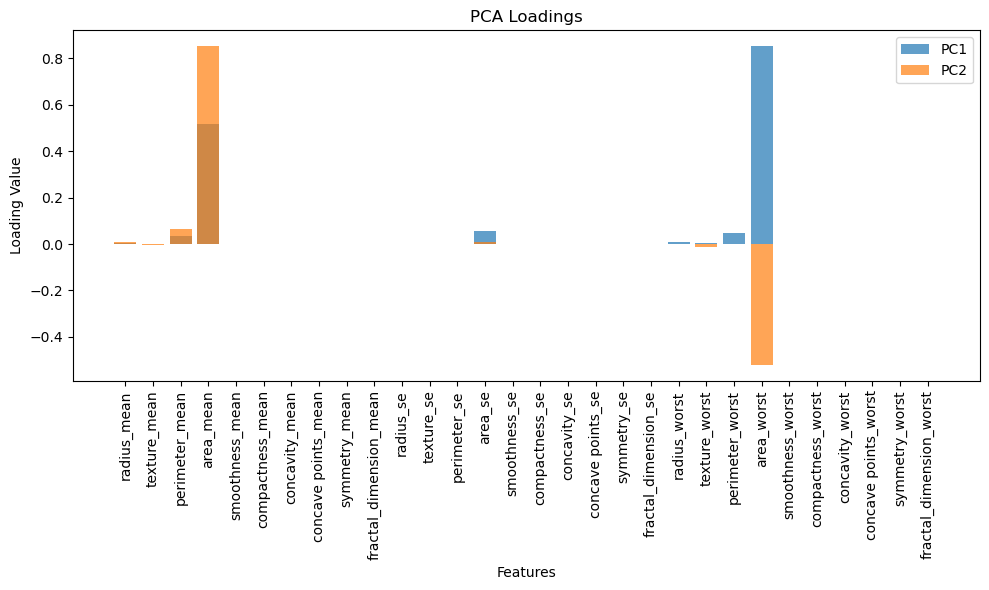

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(loadings_df.index, loadings_df['PC1'], label='PC1', alpha=0.7, color='green')
plt.bar(loadings_df.index, loadings_df['PC2'], label='PC2', alpha=0.7, color='red')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Loading Value')
plt.title('PCA Loadings')
plt.legend()
plt.tight_layout()
plt.show()

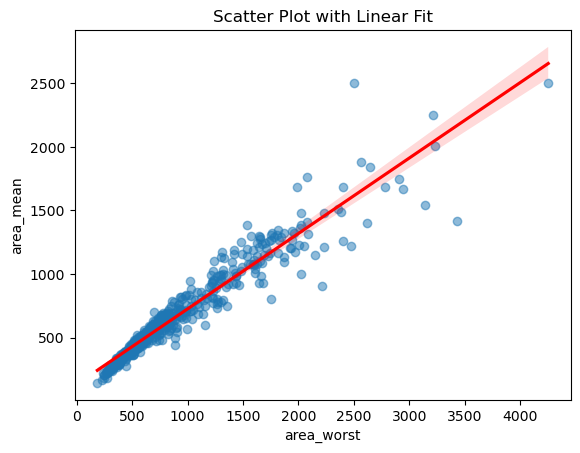

In [152]:
sns.regplot(x='area_worst', y='area_mean', data=df_excluded, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Fit')
plt.show()

In [153]:
print(loadings_df[['PC1', 'PC2']].loc[['area_mean', 'area_worst']])

                 PC1       PC2
area_mean   0.516826  0.851824
area_worst  0.852063 -0.519742


In [139]:
corr_area = df['area_mean'].corr(df['area_worst'])
print(f"Correlation between area_mean and area_worst: {corr_area}")

Correlation between area_mean and area_worst: 0.9592133256499


In [170]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(df[['perimeter_mean', 'concave points_worst']], df['diagnosis'])
print(mutual_info)

[0.40489031 0.43617459]


In [171]:
X = df[['area_mean', 'area_worst']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      Feature       VIF
0   area_mean  36.65704
1  area_worst  36.65704


### They are highly correalted but have a largest contributions in PC1 and PC2 (first fo all I want to kkep them, but they can be the candidates for tests

### Some other features, related to texture and compactness:

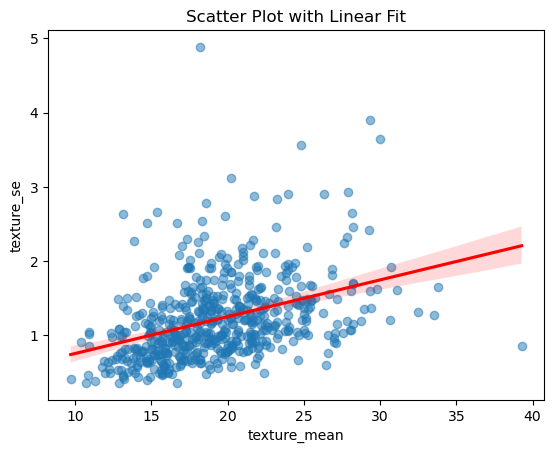

In [178]:
sns.regplot(x='texture_mean', y='texture_se', data=df_excluded, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Fit')
plt.show()

In [179]:
X = df[['texture_mean', 'texture_se']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        Feature       VIF
0  texture_mean  6.820092
1    texture_se  6.820092


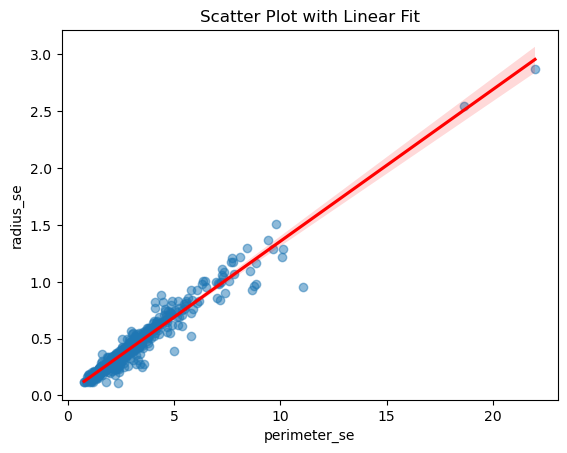

In [181]:
sns.regplot(x='perimeter_se', y='radius_se', data=df_excluded, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Fit')
plt.show()

In [180]:
X = df[['perimeter_se', 'radius_se']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        Feature       VIF
0  perimeter_se  56.13123
1     radius_se  56.13123


In [196]:
X = df[['compactness_mean', 'compactness_worst']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

             Feature        VIF
0   compactness_mean  14.338987
1  compactness_worst  14.338987


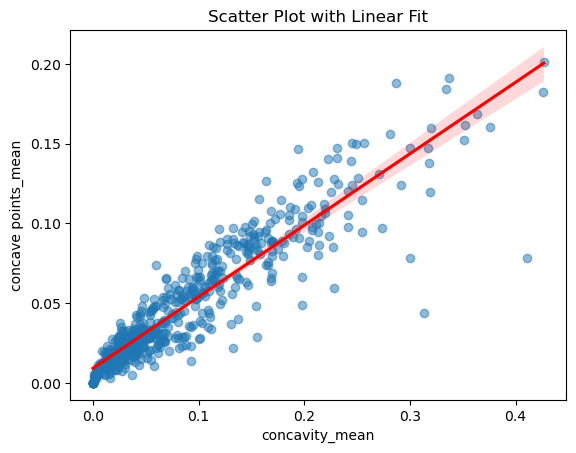

In [16]:
sns.regplot(x='concavity_mean', y='concave points_mean', data=df_excluded, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Fit')
plt.show()

In [184]:
X = df[['concavity_mean', 'concave points_worst']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                Feature       VIF
0        concavity_mean  7.593561
1  concave points_worst  7.593561


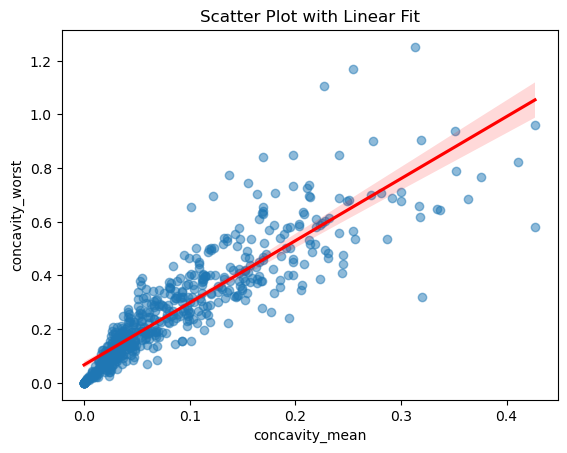

In [186]:
sns.regplot(x='concavity_mean', y='concavity_worst', data=df_excluded, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Fit')
plt.show()

In [198]:
X = df[['concavity_mean', 'concavity_worst', 'concavity_se']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

           Feature        VIF
0   concavity_mean  11.181349
1  concavity_worst  10.872855
2     concavity_se   4.023188


In [188]:
X = df[['concave points_mean', 'concave points_worst']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                Feature        VIF
0   concave points_mean  13.094301
1  concave points_worst  13.094301


In [189]:
X = df[['concave points_mean', 'concave points_se']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

               Feature       VIF
0  concave points_mean  4.164142
1    concave points_se  4.164142


In [190]:
X = df[['texture_worst', 'texture_se']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

         Feature       VIF
0  texture_worst  6.942742
1     texture_se  6.942742


In [191]:
X = df[['symmetry_worst', 'symmetry_se']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          Feature       VIF
0  symmetry_worst  8.286061
1     symmetry_se  8.286061


In [197]:
X = df[['smoothness_worst', 'smoothness_mean']]  # Include relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

            Feature       VIF
0  smoothness_worst  98.18868
1   smoothness_mean  98.18868


In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant for VIF calculation
X = add_constant(df[num_cols])

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                    Feature          VIF
0                     const  1945.673866
1               radius_mean  3817.259795
2              texture_mean    11.891280
3            perimeter_mean  3792.697001
4                 area_mean   348.115385
5           smoothness_mean     8.194309
6          compactness_mean    51.445960
7            concavity_mean    71.002747
8       concave points_mean    60.172431
9             symmetry_mean     4.220806
10   fractal_dimension_mean    15.756978
11                radius_se    75.737325
12               texture_se     4.205686
13             perimeter_se    70.398925
14                  area_se    41.196467
15            smoothness_se     4.070801
16           compactness_se    15.366350
17             concavity_se    15.914022
18        concave points_se    11.601253
19              symmetry_se     5.179151
20     fractal_dimension_se     9.724753
21             radius_worst   815.945630
22            texture_worst    18.606605
23          peri

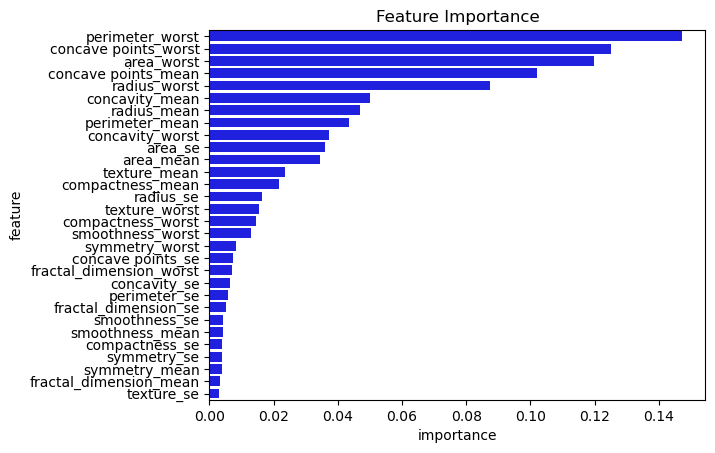

In [17]:
df_excluded = df.drop(columns=['id', 'diagnosis_numeric'])
num_cols = [cols for cols in df_excluded.columns if df_excluded[cols].dtype in ['int64', 'float64']]

importances = RandomForestClassifier().fit(df_excluded[num_cols], df_excluded['diagnosis']).feature_importances_

feature_importance = pd.DataFrame({
    'feature': num_cols,
    'importance': importances
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance, color='blue')
plt.title('Feature Importance')
plt.show()

In [175]:
feature_importance

feature  importance
22          perimeter_worst    0.131814
23               area_worst    0.108010
7       concave points_mean    0.106618
20             radius_worst    0.100865
27     concave points_worst    0.081854
3                 area_mean    0.067836
2            perimeter_mean    0.067603
0               radius_mean    0.051594
6            concavity_mean    0.050577
13                  area_se    0.039003
26          concavity_worst    0.026997
21            texture_worst    0.019604
1              texture_mean    0.019266
10                radius_se    0.016985
16             concavity_se    0.016877
24         smoothness_worst    0.016441
25        compactness_worst    0.013233
12             perimeter_se    0.007983
29  fractal_dimension_worst    0.006231
28           symmetry_worst    0.005761
11               texture_se    0.005524
14            smoothness_se    0.005499
9    fractal_dimension_mean    0.005431
4           smoothness_mean    0.005256
5          compactness_mean    0.005224
15           compactness_se    0.004682
17        concave points_se    0.003612
19     fractal_dimension_se    0.003601
18              symmetry_se    0.003030
8             symmetry_mean    0.002989

### We see, that the most important features are concave point_worst, perimeter_worst, area_worst, concave points_mean, radius_mean.

### [('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'radius_mean'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('concavity_mean', 'concave points_mean'), ('concave points_mean', 'concavity_mean'), ('concave points_mean', 'concave points_worst'), ('radius_se', 'perimeter_se'), ('radius_se', 'area_se'), ('perimeter_se', 'radius_se'), ('perimeter_se', 'area_se'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('radius_worst', 'perimeter_worst'), ('radius_worst', 'area_worst'), ('texture_worst', 'texture_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'radius_worst'), ('perimeter_worst', 'area_worst'), ('area_worst', 'radius_mean'), ('area_worst', 'perimeter_mean'), ('area_worst', 'area_mean'), ('area_worst', 'radius_worst'), ('area_worst', 'perimeter_worst'), ('concave points_worst', 'concave points_mean')]

### I will remove some of the correlated features accoring correlation matrix and VIF score, trying to get the most important

### Keeping in mind all the inforamtion I have got so far:
to remove: radius_mean (or area_mean , but area_mean I want to keep because of PCA results, perimiter_mean  - possible both - need to be tested))
from   se: radius_se, perimeter_se (defintely to keep area_se - for PCA, and feature importances it have more weight)
radius_worst - to remove (perimeter_worst and area_worst to keep
from concavity and concave points to remove: concave.points mean (concave.points_worst-to keep) 
texture_mean to remove (texture_worst -to keep)
symmetry_worst to keep (symmetry_se and symmetry_mean - to remove
compactness_worst _ to keep (remove compactness_mean)
smoothness_worst _ to keep (remove smoothenss_mean)
concavity_worst or concavity_mean to remove (one of them keep)
low impact features: smoothness_se, fractal_dimension_se, fractal dimension_mean, texture_se, compactness_se, concavity_se, concave points_se to remove

In [289]:
df_reduced=df.drop(columns=[  'radius_se', 'perimeter_se',
                            'radius_worst', 'radius_mean',
                                    'texture_mean','smoothness_se','fractal_dimension_se',
                                    'fractal_dimension_mean','texture_se', 'concavity_mean',
                           'symmetry_se', 'symmetry_mean', 'compactness_se',
                           'compactness_mean','smoothness_mean',
                            'concave points_se', 'concavity_se'])


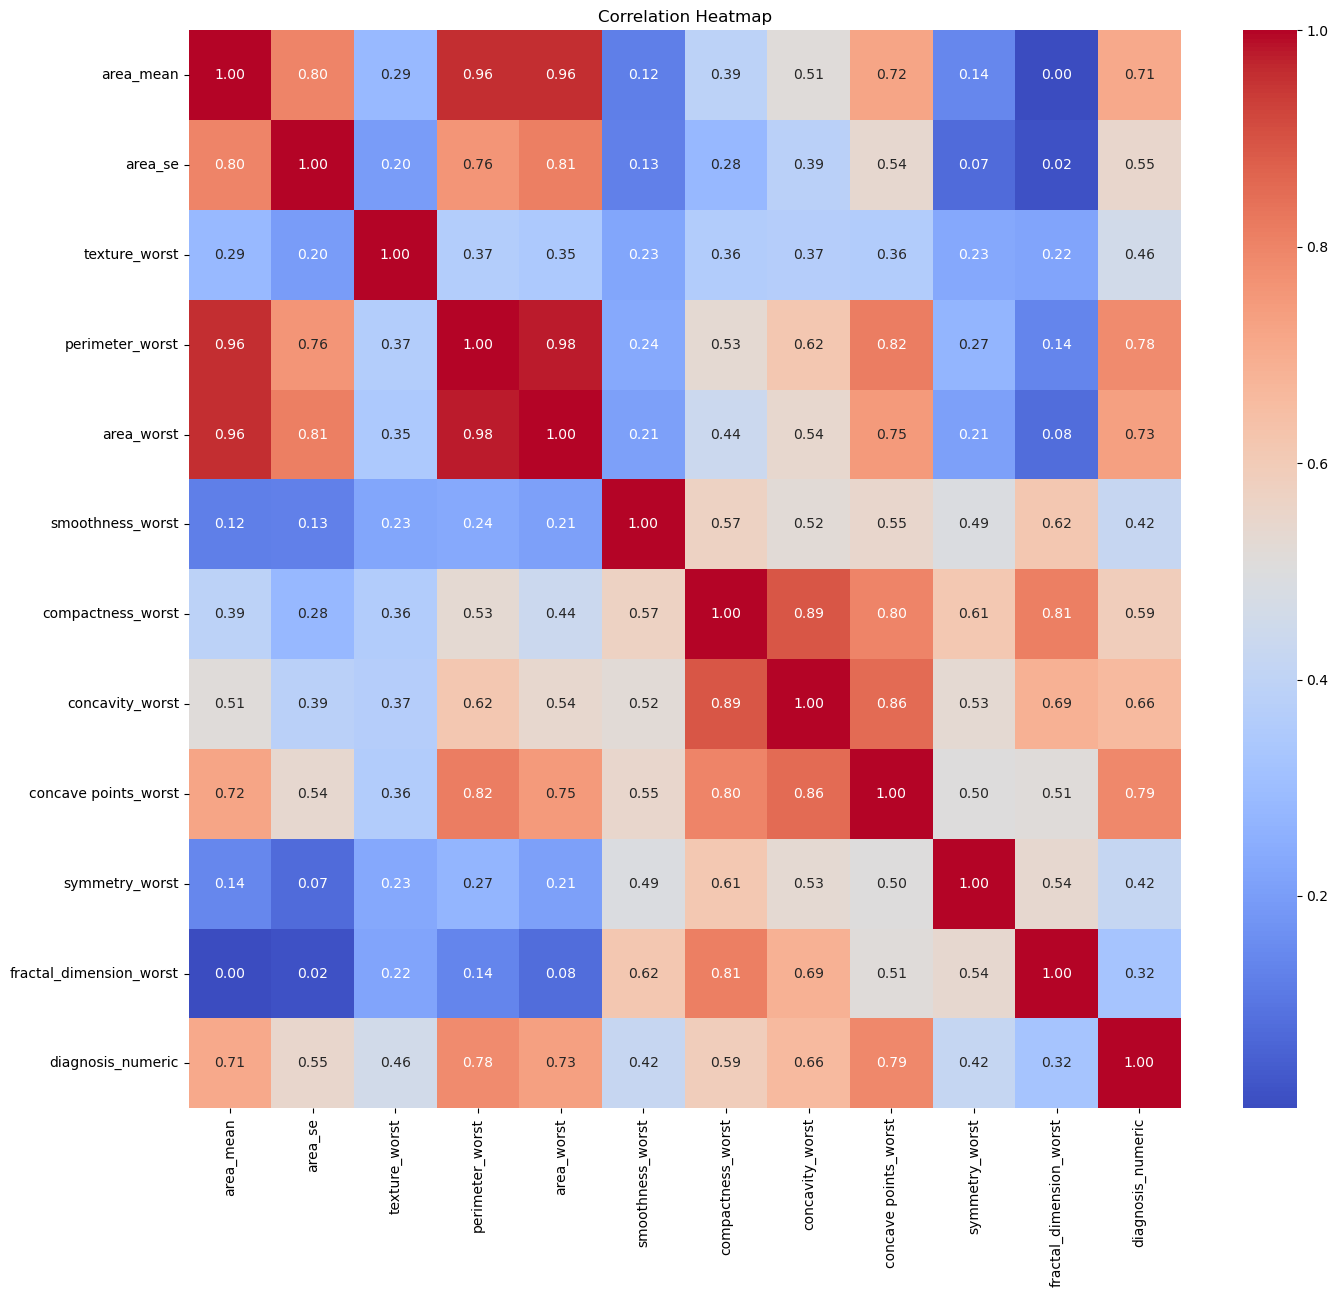

In [257]:
df_reduced_ex = df_reduced.drop(columns=['id', 'diagnosis'])
num_cols = [cols for cols in df_reduced_ex.columns if df_reduced_ex[cols].dtype in ['int64', 'float64']]

correlation_matrix = df_reduced_ex.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [259]:
df_reduced_ex = df_reduced.drop(columns=['id', 'diagnosis', 'diagnosis_numeric'])
num_cols = [cols for cols in df_reduced_ex.columns if df_reduced_ex[cols].dtype in ['int64', 'float64']]



pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_reduced_ex[num_cols])
print(pca.explained_variance_ratio_)


# Get the PCA components (loadings)
loadings = pca.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(
    loadings.T,  # Transpose so each row corresponds to a feature
    columns=[f'PC{i+1}' for i in range(loadings.shape[0])],  # Name the principal components
    index=num_cols  # Use feature names as the index
)

print(loadings_df)

[0.98216209 0.01613449]
                              PC1       PC2
area_mean                0.517135  0.854718
area_se                  0.055768  0.008114
texture_worst            0.003069 -0.013260
perimeter_worst          0.049488 -0.000275
area_worst               0.852645 -0.518860
smoothness_worst         0.000006 -0.000077
compactness_worst        0.000101 -0.000259
concavity_worst          0.000169 -0.000178
concave points_worst     0.000074 -0.000031
symmetry_worst           0.000018 -0.000158
fractal_dimension_worst  0.000002 -0.000056


In [283]:
df_max_reduced=df.drop(columns=['perimeter_mean', 'radius_mean', 'radius_se', 'perimeter_se',
                            'radius_worst','concave points_mean',
                                    'texture_mean','smoothness_se','fractal_dimension_se',
                                    'fractal_dimension_mean','texture_se',
                           'symmetry_se', 'symmetry_mean', 'compactness_se',
                           'compactness_mean','smoothness_mean', 'concavity_mean',
                           'concave points_mean', 'concave points_se', 'concavity_se',
                               'smoothness_worst', 'compactness_worst', 'concave points_worst',
                               'symmetry_worst', 'fractal_dimension_worst'])


In [261]:
df_max_reduced_ex = df_max_reduced.drop(columns=['id', 'diagnosis', 'diagnosis_numeric'])
num_cols = [cols for cols in df_max_reduced_ex.columns if df_max_reduced_ex[cols].dtype in ['int64', 'float64']]



pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_reduced_ex[num_cols])
print(pca.explained_variance_ratio_)


# Get the PCA components (loadings)
loadings = pca.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(
    loadings.T,  # Transpose so each row corresponds to a feature
    columns=[f'PC{i+1}' for i in range(loadings.shape[0])],  # Name the principal components
    index=num_cols  # Use feature names as the index
)

print(loadings_df)

[0.98216215 0.01613449]
                      PC1       PC2
area_mean        0.517135  0.854718
area_se          0.055768  0.008114
texture_worst    0.003069 -0.013260
perimeter_worst  0.049488 -0.000275
area_worst       0.852645 -0.518860
concavity_worst  0.000169 -0.000178


### I think from now on, I want to validate models on these datasets (full, reduced and max reduced), I chose the random forest for this

Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[72  0]
 [ 3 39]]
Accuracy: 0.9736842105263158
ROC AUC Score: 0.9928902116402116


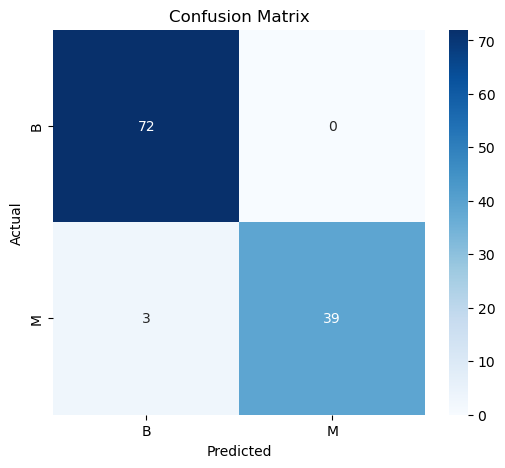

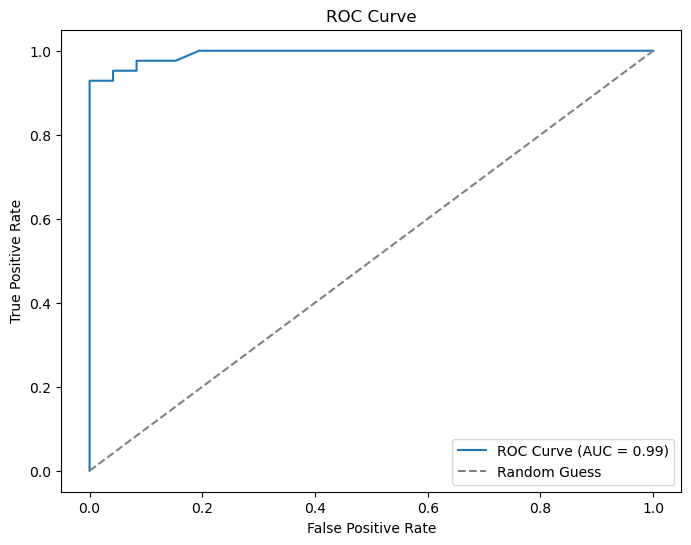

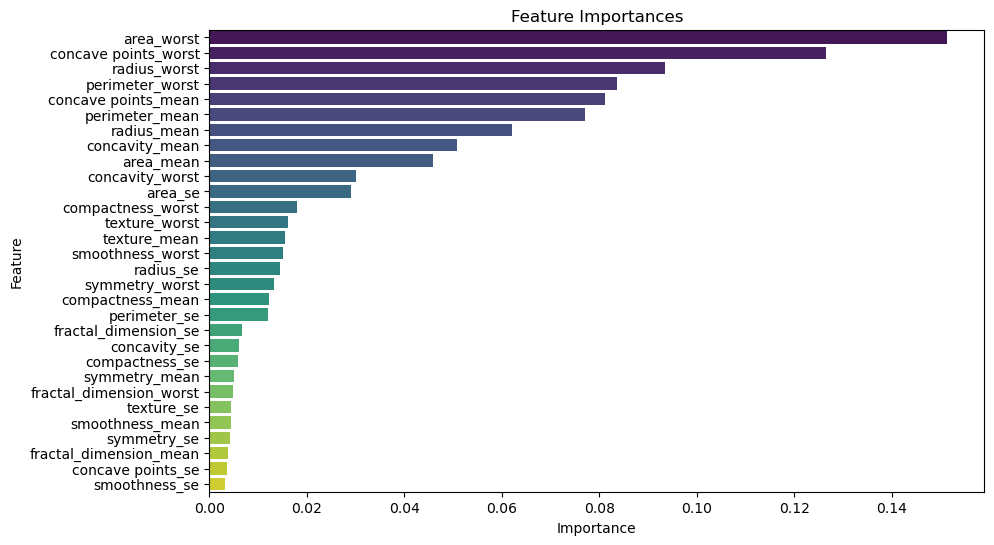

In [314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into features and target
X = df.drop(columns=['diagnosis', 'id', 'diagnosis_numeric'])  # Exclude the target column
y = df['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC Curve
# Convert y_test to numeric if necessary
y_test_numeric = y_test.map({'B': 0, 'M': 1})  # Option 2

# Compute probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test_numeric, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Feature Importances
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

In [267]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train model with the best parameters
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_s

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_s

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_s

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf

In [270]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, min_samples_leaf=1,
                           min_samples_split=5, n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[72  0]
 [ 3 39]]


In [276]:
# Assign weights to classes: Higher weight for minority class ('M')
class_weights = {'B': 1, 'M': 2}  # Adjust weights based on your dataset and goals

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, class_weight=class_weights, bootstrap=False, max_depth=None, min_samples_leaf=1,
                            min_samples_split=5, n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[72  0]
 [ 3 39]]


Classification Report:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[72  0]
 [ 4 38]]
Accuracy: 0.9649122807017544
ROC AUC Score: 0.9947089947089947


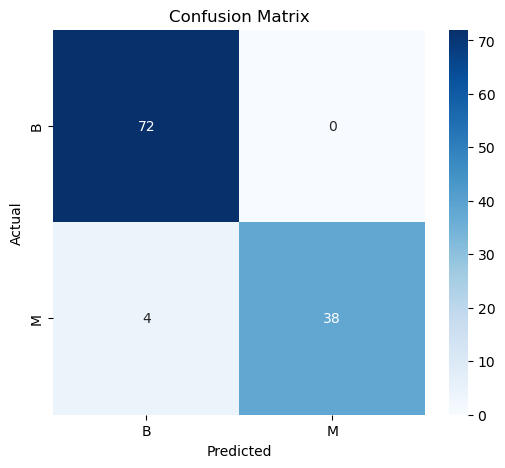

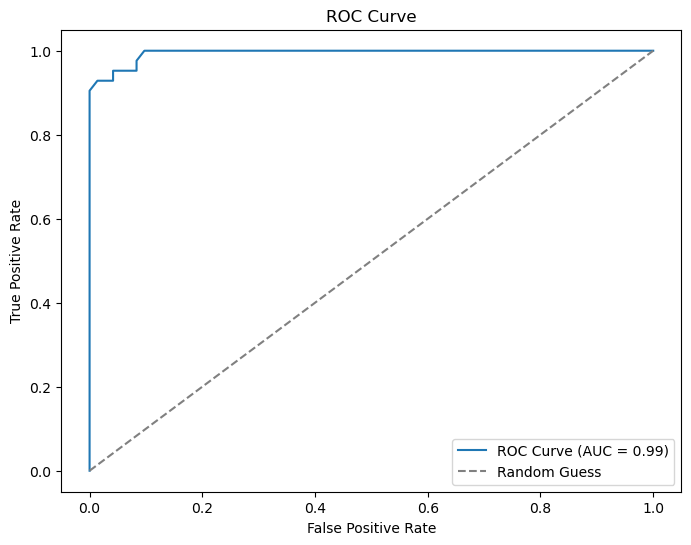

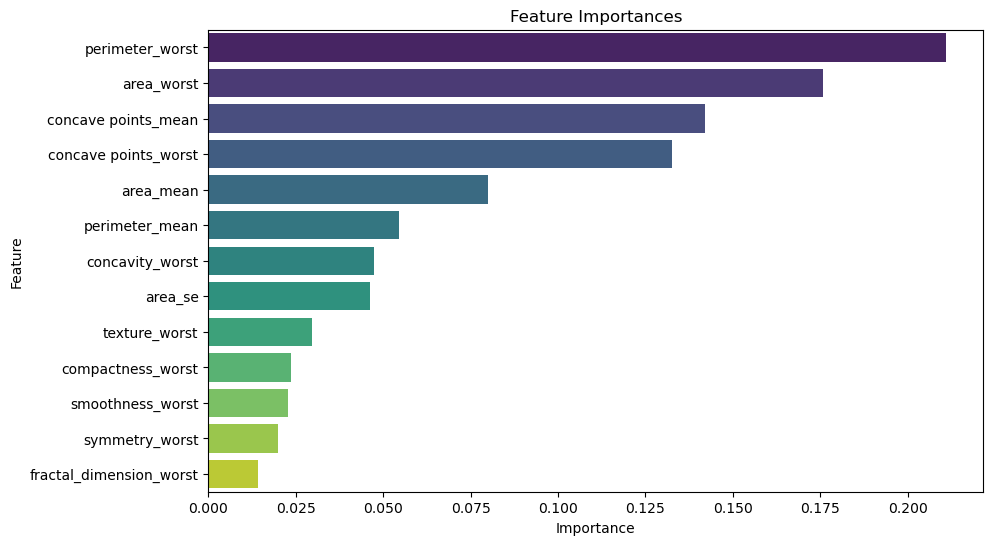

In [291]:
#reduced datase
# Split the dataset into features and target
X = df_reduced.drop(columns=['diagnosis', 'id', 'diagnosis_numeric'])  # Exclude the target column
y = df_reduced['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC Curve
# Convert y_test to numeric if necessary
y_test_numeric = y_test.map({'B': 0, 'M': 1})  # Option 2

# Compute probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test_numeric, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Feature Importances
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[72  0]
 [ 5 37]]
Accuracy: 0.956140350877193
ROC AUC Score: 0.9947089947089948


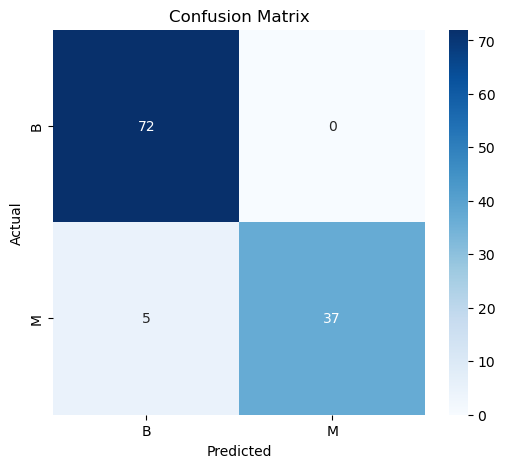

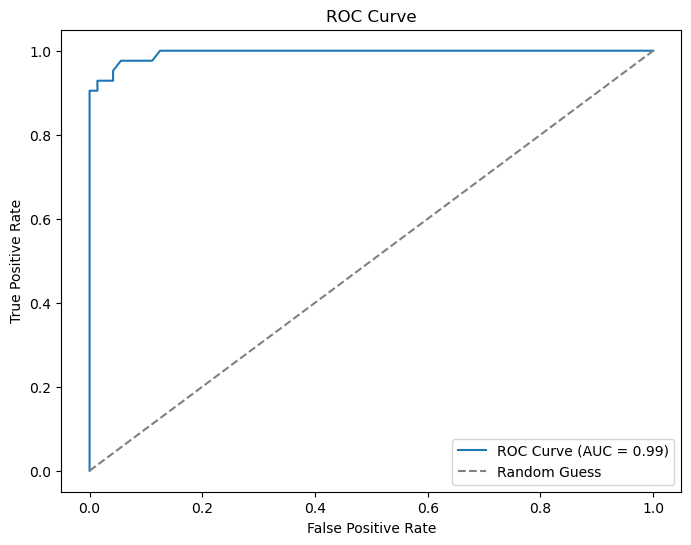

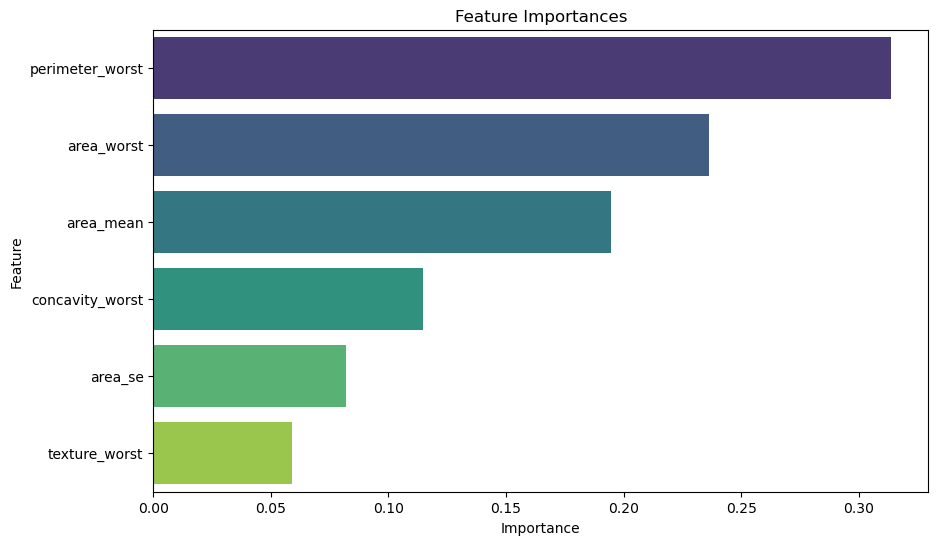

In [290]:
# Split the dataset into features and target
X = df_max_reduced.drop(columns=['diagnosis', 'id', 'diagnosis_numeric'])  # Exclude the target column
y = df_max_reduced['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC Curve
# Convert y_test to numeric if necessary
y_test_numeric = y_test.map({'B': 0, 'M': 1})  # Option 2

# Compute probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test_numeric, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Feature Importances
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

In [332]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, min_samples_leaf=1,
                           min_samples_split=5, n_estimators=100)

selector = SelectKBest(score_func=mutual_info_classif, k=15)  # Try different values of k

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)



# Train Random Forest with selected features
rf.fit(X_train_selected, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)

In [333]:
# Get the selected feature indices
selected_features = X_train.columns[selector.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


In [334]:

# Predict on the test set
y_pred = rf.predict(X_test_selected)
y_pred_prob = rf.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[71  1]
 [ 4 38]]


In [335]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_new, y_train, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-Validation Accuracy: 0.9360 ± 0.0520


In [342]:
from sklearn.feature_selection import SelectKBest, chi2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, min_samples_leaf=1,
                           min_samples_split=5, n_estimators=100)
# Apply SelectKBest
selector = SelectKBest(score_func=chi2, k='all')  # k="all" to get scores for all features
#selector.fit(X_train, y_train)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


rf.fit(X_train_selected, y_train)
# Get the scores of the selected features
feature_scores = selector.scores_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame with feature names and their corresponding scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
})

# Sort the features by score
feature_importance_df = feature_importance_df.sort_values(by='Score', ascending=False)

# Display the selected features with their scores
print(feature_importance_df)

# Predict on the test set
y_pred = rf.predict(X_test_selected)
y_pred_prob = rf.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

                    Feature         Score
23               area_worst  92574.107701
3                 area_mean  44301.419325
13                  area_se   7337.838986
22          perimeter_worst   3013.196990
2            perimeter_mean   1647.177721
20             radius_worst    403.262787
0               radius_mean    217.672175
12             perimeter_se    210.120610
21            texture_worst    141.067689
1              texture_mean     73.630059
26          concavity_worst     30.688979
10                radius_se     29.008044
6            concavity_mean     15.882058
25        compactness_worst     15.362710
27     concave points_worst     10.859628
7       concave points_mean      8.778762
5          compactness_mean      4.673977
28           symmetry_worst      1.125014
16             concavity_se      0.738713
15           compactness_se      0.452153
24         smoothness_worst      0.353090
17        concave points_se      0.248689
8             symmetry_mean      0

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


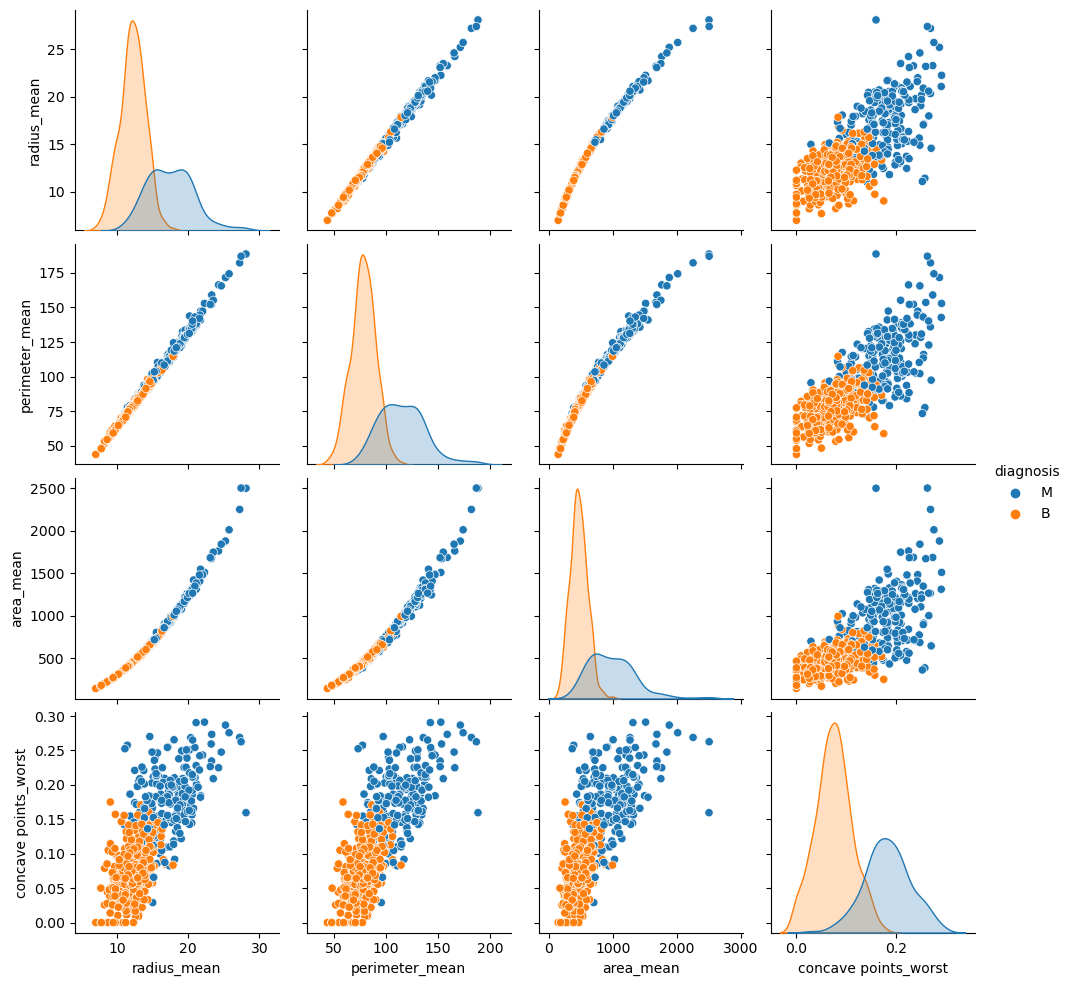

In [117]:
sns.pairplot(df, vars=["radius_mean", "perimeter_mean", "area_mean", "concave points_worst"], hue="diagnosis")
plt.show()

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


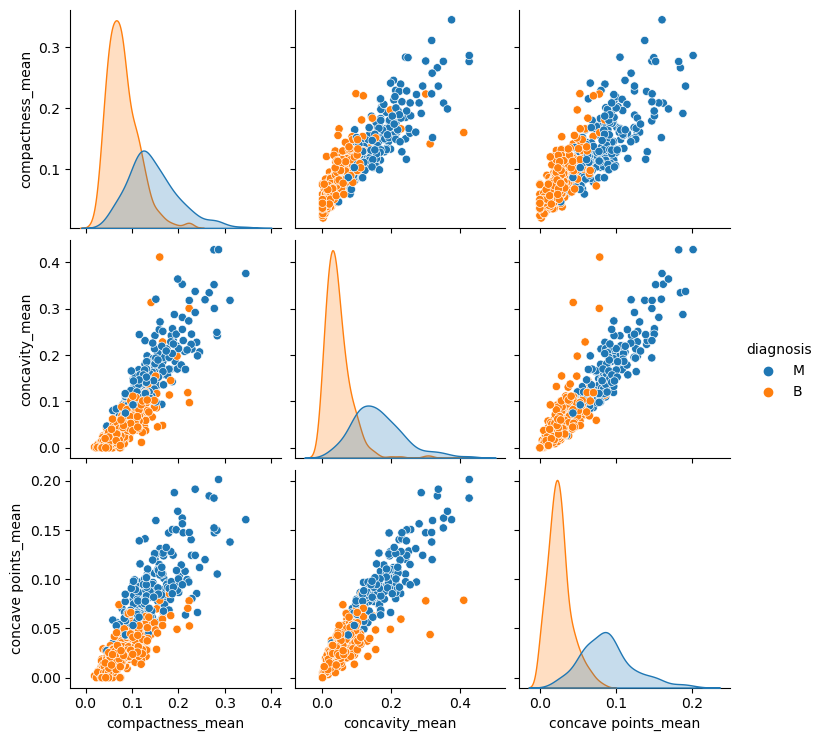

In [28]:
sns.pairplot(df, vars=["compactness_mean", "concavity_mean", "concave points_mean"], hue="diagnosis")
plt.show()

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


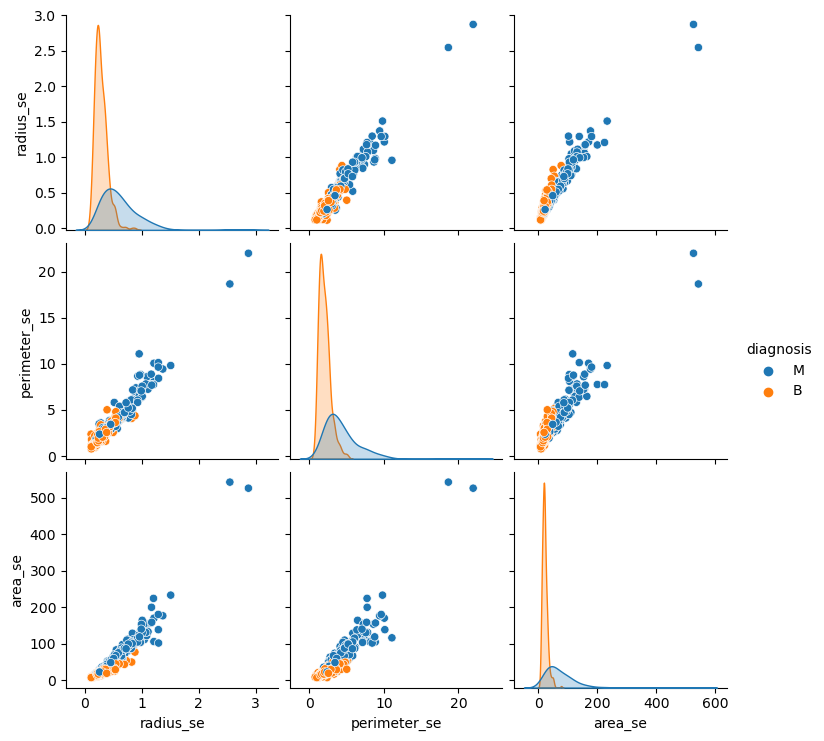

In [29]:
sns.pairplot(df, vars=["radius_se", "perimeter_se", "area_se"], hue="diagnosis")
plt.show()

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


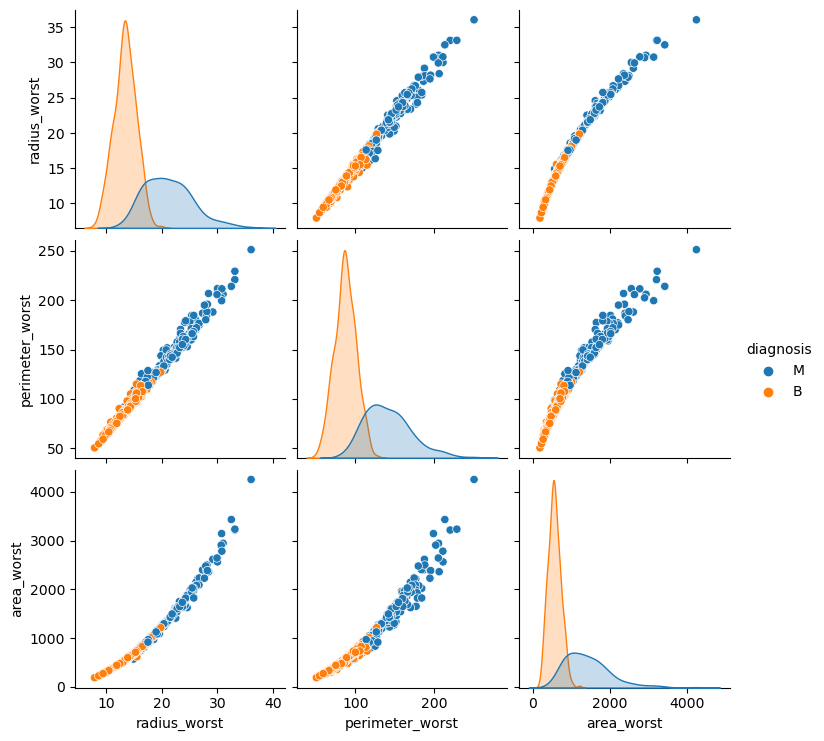

In [30]:
sns.pairplot(df, vars=["radius_worst", "perimeter_worst", "area_worst"], hue="diagnosis")
plt.show()

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


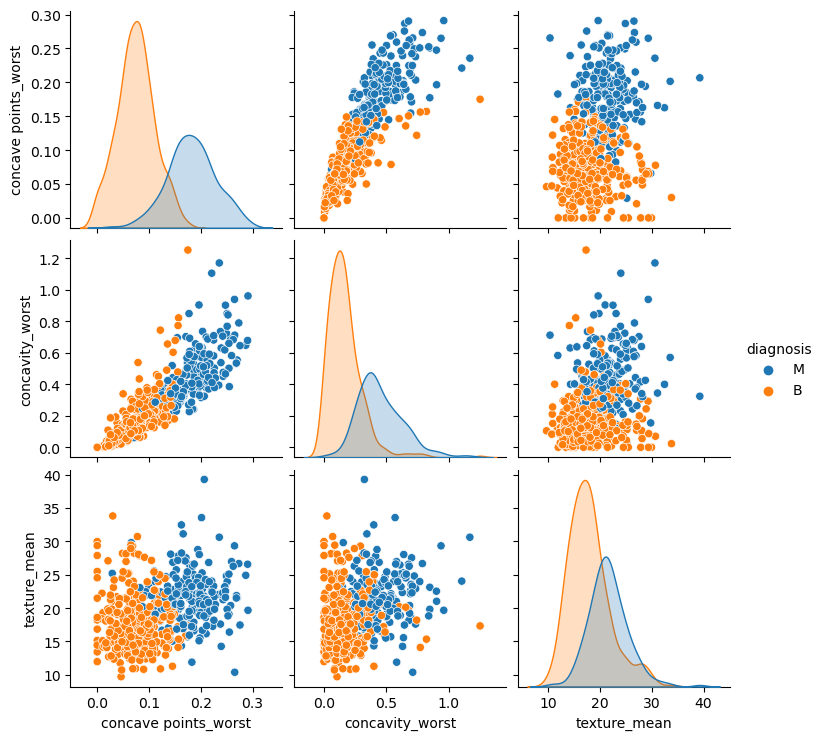

In [32]:
sns.pairplot(df, vars=["concave points_worst", "concavity_worst", "texture_mean"], hue="diagnosis")
plt.show()

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


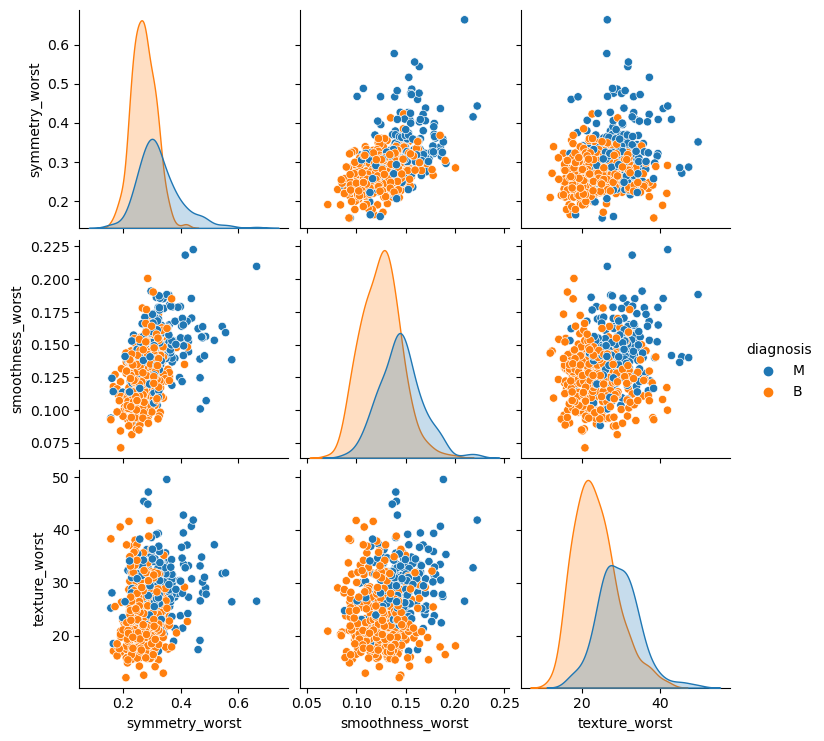

In [34]:
sns.pairplot(df, vars=["symmetry_worst", "smoothness_worst", "texture_worst"], hue="diagnosis")
plt.show()

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


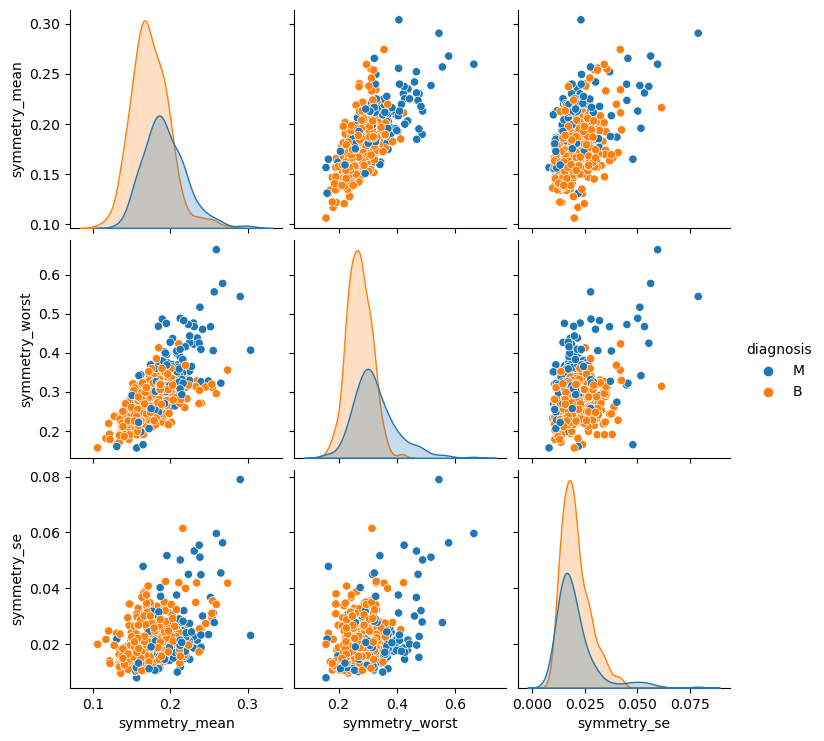

In [193]:
sns.pairplot(df, vars=["symmetry_mean", "symmetry_worst","symmetry_se"], hue="diagnosis")
plt.show()

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


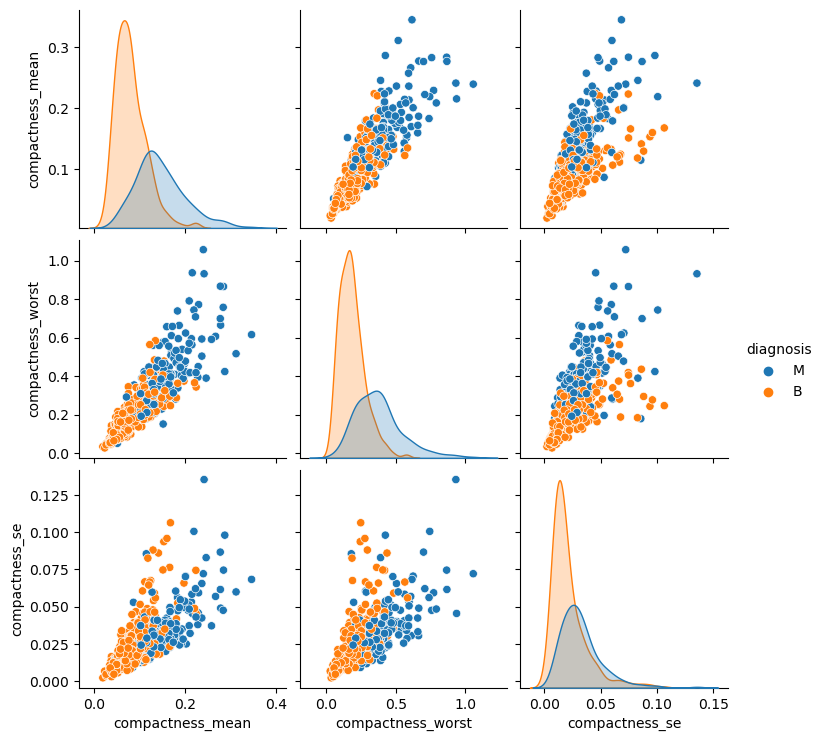

In [194]:
sns.pairplot(df, vars=["compactness_mean", "compactness_worst","compactness_se"], hue="diagnosis")
plt.show()

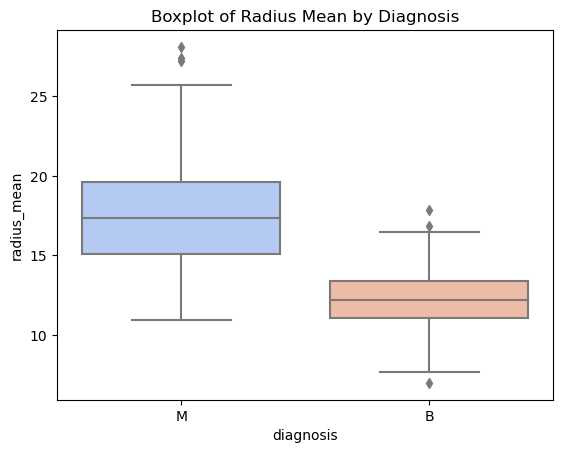

In [40]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='coolwarm')
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

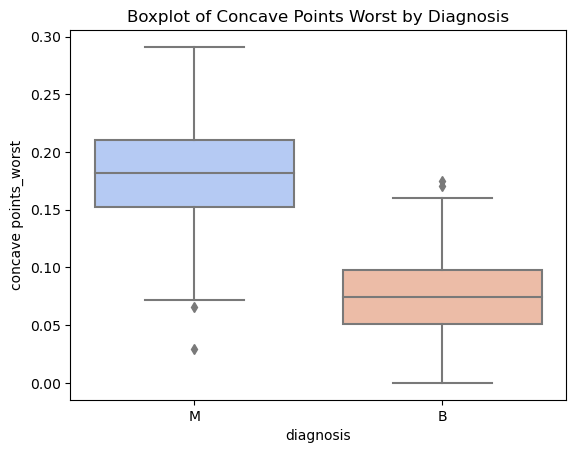

In [41]:
sns.boxplot(x='diagnosis', y='concave points_worst', data=df, palette='coolwarm')
plt.title('Boxplot of Concave Points Worst by Diagnosis')
plt.show()

/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/566781809.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'M']['radius_mean'], label='Malignant', shade=True)
/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/566781809.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'B']['radius_mean'], label='Benign', shade=True)


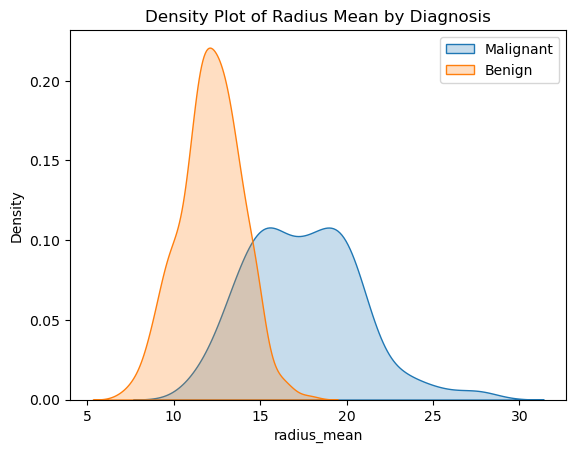

In [42]:
sns.kdeplot(df[df['diagnosis'] == 'M']['radius_mean'], label='Malignant', shade=True)
sns.kdeplot(df[df['diagnosis'] == 'B']['radius_mean'], label='Benign', shade=True)
plt.title('Density Plot of Radius Mean by Diagnosis')
plt.legend()
plt.show()

/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/2220522021.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'M']['radius_worst'], label='Malignant', shade=True)
/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/2220522021.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'B']['radius_worst'], label='Benign', shade=True)


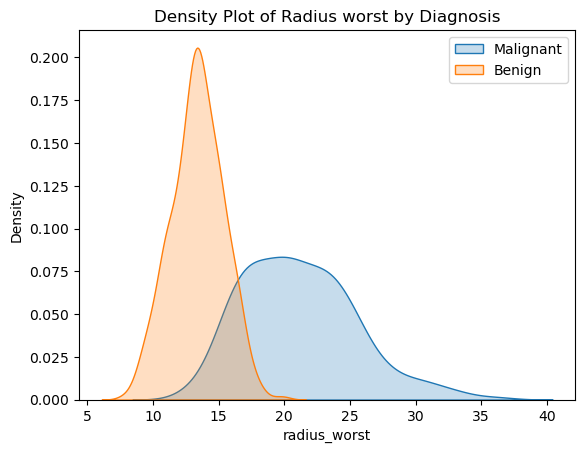

In [43]:
sns.kdeplot(df[df['diagnosis'] == 'M']['radius_worst'], label='Malignant', shade=True)
sns.kdeplot(df[df['diagnosis'] == 'B']['radius_worst'], label='Benign', shade=True)
plt.title('Density Plot of Radius worst by Diagnosis')
plt.legend()
plt.show()

/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/4021957282.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'M']['compactness_mean'], label='Malignant', shade=True)
/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/4021957282.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'B']['compactness_mean'], label='Benign', shade=True)


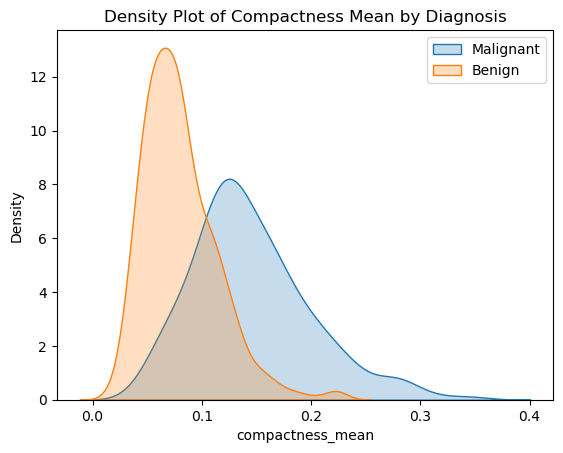

In [44]:
sns.kdeplot(df[df['diagnosis'] == 'M']['compactness_mean'], label='Malignant', shade=True)
sns.kdeplot(df[df['diagnosis'] == 'B']['compactness_mean'], label='Benign', shade=True)
plt.title('Density Plot of Compactness Mean by Diagnosis')
plt.legend()
plt.show()

/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/3366177750.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'M']['concave points_worst'], label='Malignant', shade=True)
/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/3366177750.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'B']['concave points_worst'], label='Benign', shade=True)


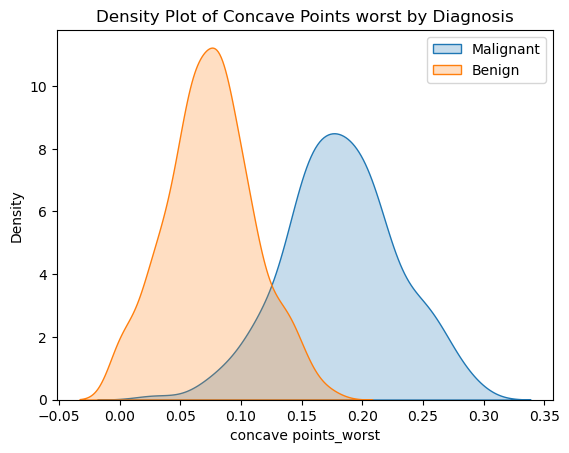

In [47]:
sns.kdeplot(df[df['diagnosis'] == 'M']['concave points_worst'], label='Malignant', shade=True)
sns.kdeplot(df[df['diagnosis'] == 'B']['concave points_worst'], label='Benign', shade=True)
plt.title('Density Plot of Concave Points worst by Diagnosis')
plt.legend()
plt.show()

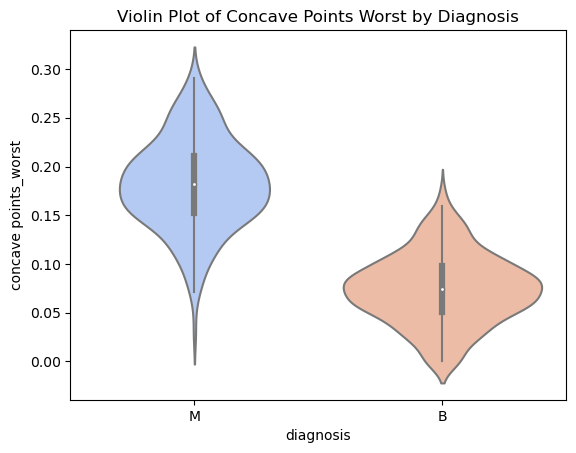

In [49]:
sns.violinplot(x='diagnosis', y='concave points_worst', data=df, palette='coolwarm')
plt.title('Violin Plot of Concave Points Worst by Diagnosis')
plt.show()

/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/1219780156.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'M']['texture_mean'], label='Malignant', shade=True)
/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_91836/1219780156.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diagnosis'] == 'B']['texture_mean'], label='Benign', shade=True)


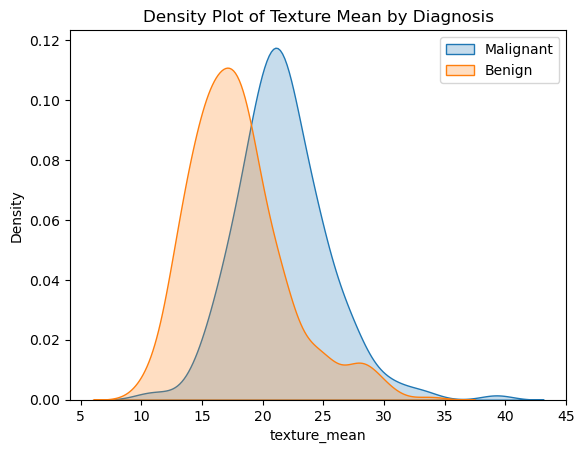

In [50]:
sns.kdeplot(df[df['diagnosis'] == 'M']['texture_mean'], label='Malignant', shade=True)
sns.kdeplot(df[df['diagnosis'] == 'B']['texture_mean'], label='Benign', shade=True)
plt.title('Density Plot of Texture Mean by Diagnosis')
plt.legend()
plt.show()

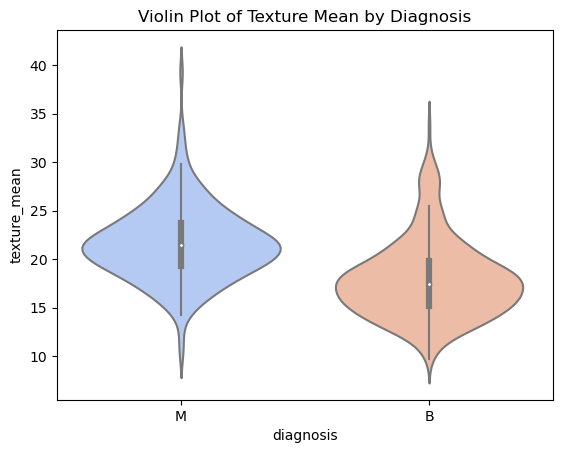

In [46]:
sns.violinplot(x='diagnosis', y='texture_mean', data=df, palette='coolwarm')
plt.title('Violin Plot of Texture Mean by Diagnosis')
plt.show()

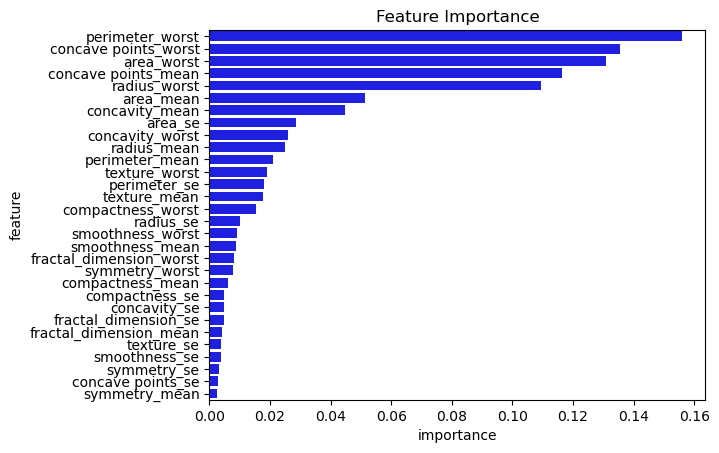

In [86]:
from sklearn.ensemble import RandomForestClassifier

df_excluded = df.drop(columns=['id', 'diagnosis_numeric'])
num_cols = [cols for cols in df_excluded.columns if df_excluded[cols].dtype in ['int64', 'float64']]

importances = RandomForestClassifier().fit(df_excluded[num_cols], df_excluded['diagnosis']).feature_importances_

feature_importance = pd.DataFrame({
    'feature': num_cols,
    'importance': importances
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance, color='blue')
plt.title('Feature Importance')
plt.show()

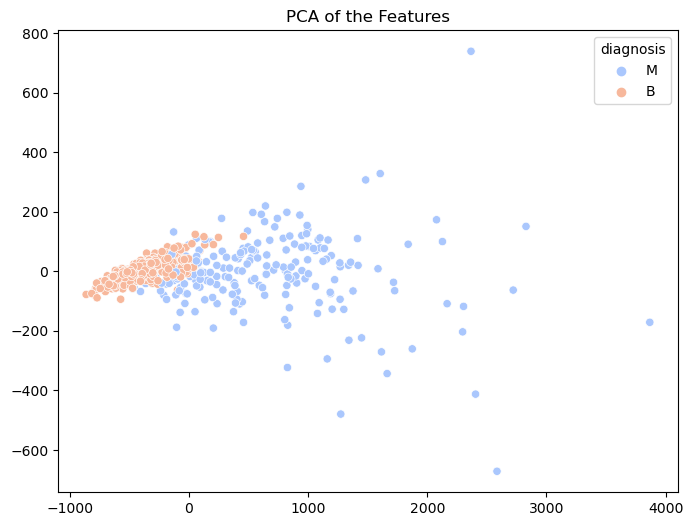

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_excluded[num_cols])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_excluded['diagnosis'], palette='coolwarm')
plt.title('PCA of the Features')
plt.show()

In [88]:

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.98204467 0.01617649]


In [70]:
pca = PCA(n_components=6)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_excluded[num_cols])
pca_result = PCA(n_components=2).fit_transform(scaled_data)



In [71]:
import numpy as np

corr_matrix = np.corrcoef(scaled_data.T)

<Axes: >

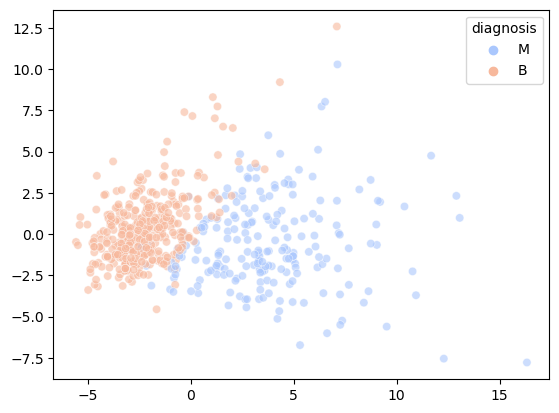

In [72]:
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_excluded['diagnosis'], palette='coolwarm', alpha=0.6)

<Axes: >

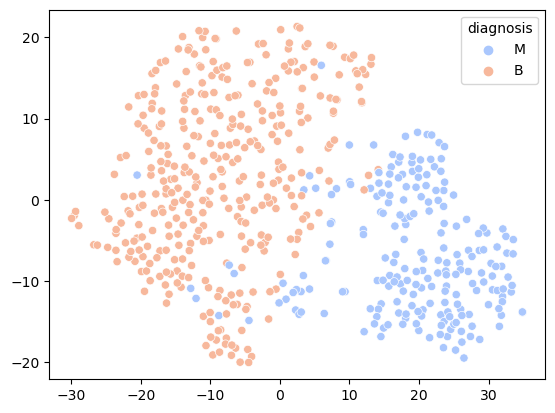

In [73]:
from sklearn.manifold import TSNE

tsne_result = TSNE(n_components=2).fit_transform(scaled_data)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df_excluded['diagnosis'], palette='coolwarm')